In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("Heart_Disease_Prediction.csv")
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [7]:
data=pd.get_dummies(data, columns=["Age", "Chest pain type", "Cholesterol", "BP","EKG results", "Exercise angina", "Max HR", "ST depression"], drop_first=True)
data

,Sex,FBS over 120,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Age_34,Age_35,Age_37,Age_38,...,ST depression_3.1,ST depression_3.2,ST depression_3.4,ST depression_3.5,ST depression_3.6,ST depression_3.8,ST depression_4.0,ST depression_4.2,ST depression_5.6,ST depression_6.2
0,1,0,2,3,3,Presence,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,2,0,7,Absence,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0,1,0,7,Presence,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0,2,1,7,Absence,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,1,1,3,Absence,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,1,1,0,7,Absence,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
266,1,0,1,0,7,Absence,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
267,0,0,2,0,3,Absence,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
268,1,0,2,0,6,Absence,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
X=data.drop("Heart Disease", axis=1)
Y=data["Heart Disease"]
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.3, random_state=42)

In [9]:
log_reg=LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [10]:
y_pred=log_reg.predict(X_test)
y_pred

array(['Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 

In [11]:
accuracy_score(Y_test, y_pred)

0.7777777777777778

In [12]:
y_pred_proba=log_reg.predict_proba(X_test)[:,1]
y_pred_proba

array([0.23945787, 0.57598255, 0.03245473, 0.03624575, 0.36451627,
       0.77338985, 0.20787185, 0.07329959, 0.58766204, 0.01425243,
       0.11141087, 0.48962841, 0.60170865, 0.70147555, 0.18261543,
       0.20502149, 0.1452475 , 0.24468699, 0.89203855, 0.17298403,
       0.92457581, 0.19307444, 0.21246699, 0.01284166, 0.06318675,
       0.93753712, 0.27489806, 0.81840922, 0.05130974, 0.07083243,
       0.00663912, 0.13930357, 0.28969047, 0.14776843, 0.38615351,
       0.47276789, 0.85441491, 0.16851931, 0.9261737 , 0.3094406 ,
       0.0090723 , 0.01174946, 0.0374324 , 0.67546513, 0.01669288,
       0.01302304, 0.27904409, 0.49097516, 0.70212416, 0.37292325,
       0.25633744, 0.01455547, 0.11283655, 0.88170217, 0.0680935 ,
       0.98152204, 0.15424048, 0.3865391 , 0.05922326, 0.08223139,
       0.98598306, 0.96002144, 0.62937213, 0.76072289, 0.45365604,
       0.51460354, 0.0242983 , 0.46372942, 0.66428392, 0.14714064,
       0.27276745, 0.45596349, 0.13854982, 0.1513879 , 0.20756

In [13]:
Y_test=Y_test.map({'Presence': 1, 'Absence':0})

In [14]:
fpr, tpr, thresholds=roc_curve(Y_test, y_pred_proba)
auc=roc_auc_score(Y_test, y_pred_proba)

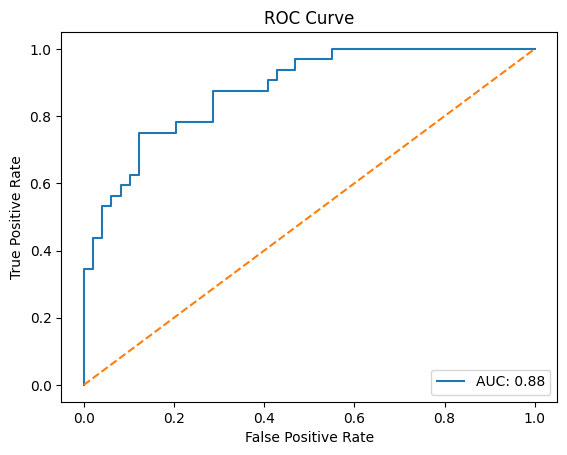

In [15]:
plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [16]:
odds_ratios=np.exp(log_reg.coef_)

In [17]:
odds_ratios

array([[2.35311137, 0.70699662, 3.0805878 , 2.19298624, 1.47003669,
        0.90743666, 1.2550827 , 0.98425222, 1.23635847, 1.16272327,
        1.44043464, 0.80525154, 0.81189851, 0.73759549, 1.15596355,
        0.60114911, 0.91305496, 2.02567938, 1.15943437, 0.91914334,
        0.92300969, 0.78518796, 0.43829772, 0.62047508, 0.57186405,
        1.314624  , 1.0353782 , 0.6556092 , 1.66153604, 1.39714155,
        1.71191172, 2.06864932, 0.86790448, 0.78479591, 0.89130254,
        1.19616599, 1.02006529, 0.87786362, 1.23185869, 0.96559432,
        1.22930308, 0.92853044, 0.92203635, 1.        , 1.        ,
        0.99145525, 0.60866226, 3.24987382, 0.951202  , 1.        ,
        1.        , 1.02663855, 1.06166238, 1.07322622, 0.95135872,
        1.        , 1.02348723, 1.        , 0.74501144, 0.97816589,
        1.        , 0.92835259, 1.        , 1.1255656 , 1.56590297,
        0.83683434, 1.        , 1.        , 1.        , 0.87495835,
        0.96958845, 1.19496382, 1.0920293 , 0.96